<a href="https://colab.research.google.com/github/jadenkr/DATASCI112/blob/main/FinalProject_MachineLearning_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Navajo Nation Water Quality - Machine Learning

[NTUA](https://www.ntua.com/index.html) is a utility company on the Navajo Nation that reports water quality across the Navajo Nation in various communities. I want to predict the levels of Arsenic on the Navajo Nation given other chemicals levels. I also will try predicting just using location.

My visualizations for the data are as follows:
- `Data prep` : I get the data ready to use.
- `K-Neighbors` : I optimize for k neighbors.
- `XGBRegressor` : I optimize for XGB Regressor and try a few more regressors.
- `Ensemble` : I ensemble both K-Neighbors and XGB
- `Using only geographic information` : I only use geographical information and not chemcials.

# Data Prep :

In [1]:
import pandas as pd

In [2]:
# I use this to gain access to my Google Drive where I'll access the data.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_water = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/DATASCI112_FinalProject/final_data.csv")

In [4]:
df_water

,Unnamed: 0,Public Water System ID #,Community Name,State,Chlorine Max Level,Chlorine Measured Level,Chlorine Exceeded,Five Haloacetic Acids Max Level,Five Haloacetic Acids Measured Level,Five Haloacetic Acids Exceeded,...,Copper Max Level,Copper Measured Level,Copper Exceeded,Lead Max Level,Lead Measured Level,Lead Exceeded,Address,Latitude,Longitude,Altitude (Meters)
0,0,093500302,Rock Springs,New Mexico,4.0,0.6637,No,NaN,NaN,NaN,...,1.3,0.041,No,NaN,NaN,NaN,"Rock Springs, New Mexico",35.609465,-108.829253,2005.309204
1,1,NN0400280,Houck and Querino Canyon,Arizona,4.0,0.4213,No,NaN,NaN,NaN,...,1.3,0.090,No,15.0,2.0,No,"Houck and Querino Canyon, Arizona",34.048928,-111.093731,1534.655396
2,2,NN0400813,Pine Springs,Arizona,4.0,0.2900,No,60.0,2.6,No,...,1.3,0.476,No,15.0,3.5,No,"Pine Springs, Arizona",35.405300,-109.280097,2124.082520
3,3,NN0403015,Oak Springs,Arizona,4.0,0.3767,No,NaN,NaN,NaN,...,1.3,0.082,No,NaN,NaN,NaN,"Oak Springs, Arizona",35.475560,-109.126940,1995.994629
4,4,NN0403025,Sawmill,Arizona,4.0,0.1075,No,60.0,11.0,No,...,1.3,1.300,No,15.0,2.8,No,"Sawmill, Arizona",35.902511,-109.165931,2339.757080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,NN3503039,Crownpoint,New Mexico,4.0,0.7406,No,NaN,NaN,NaN,...,1.3,0.027,No,15.0,2.0,No,"Crownpoint, New Mexico",35.678077,-108.151179,2125.853271
89,89,NN3503041,Ojo Encino North,New Mexico,4.0,0.6154,No,60.0,6.2,No,...,1.3,0.082,No,15.0,1.0,No,"Ojo Encino North, New Mexico",35.955574,-107.347824,2055.937744
90,90,NN3503060,Casamero Cup,New Mexico,4.0,0.8971,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Casamero Cup, New Mexico",34.519940,-105.870090,1917.724487
91,91,NN3510002,Boardman Loop,AZ,4.0,0.5992,No,NaN,NaN,NaN,...,1.3,0.033,No,NaN,NaN,NaN,"Boardman Loop , AZ",34.048928,-111.093731,1534.655396


In [43]:
df_arsenic = df_water[df_water["Arsenic Measured Level"] > 0]
df_arsenic

,Unnamed: 0,Public Water System ID #,Community Name,State,Chlorine Max Level,Chlorine Measured Level,Chlorine Exceeded,Five Haloacetic Acids Max Level,Five Haloacetic Acids Measured Level,Five Haloacetic Acids Exceeded,...,Copper Max Level,Copper Measured Level,Copper Exceeded,Lead Max Level,Lead Measured Level,Lead Exceeded,Address,Latitude,Longitude,Altitude (Meters)
3,3,NN0403015,Oak Springs,Arizona,4.0,0.3767,No,NaN,NaN,NaN,...,1.3,0.0820,No,NaN,NaN,NaN,"Oak Springs, Arizona",35.475560,-109.126940,1995.994629
4,4,NN0403025,Sawmill,Arizona,4.0,0.1075,No,60.0,11.0,No,...,1.3,1.3000,No,15.0,2.8,No,"Sawmill, Arizona",35.902511,-109.165931,2339.757080
5,5,NN0403102,New Lands,Arizona,4.0,0.6464,No,NaN,NaN,NaN,...,1.3,0.1740,No,NaN,NaN,NaN,"New Lands, Arizona",34.048928,-111.093731,1534.655396
12,12,NN3500277,Defiance,AZ,4.0,0.6162,No,NaN,NaN,NaN,...,1.3,0.1300,No,NaN,NaN,NaN,"Defiance , AZ",35.744460,-109.076483,2082.746826
14,14,NN3503012,Crystal,New Mexico,4.0,0.5708,No,NaN,NaN,NaN,...,1.3,0.0760,No,15.0,1.0,No,"Crystal, New Mexico",36.045842,-108.966205,2294.710693
15,15,NN0403000,Window Rock,Arizona,4.0,0.2484,No,60.0,5.4,No,...,1.3,1.0300,No,15.0,2.0,No,"Window Rock, Arizona",35.680573,-109.052593,2099.730957
23,23,NN0403005,Tsaile and Dine College,Arizona,4.0,0.8733,No,60.0,2.1,No,...,1.3,0.3180,No,15.0,1.0,No,"Tsaile and Dine College, Arizona",36.293885,-109.216157,2158.991211
24,24,NN0403021,Cottonwood and Tselani,Arizona,4.0,0.4658,No,NaN,NaN,NaN,...,1.3,0.0200,No,NaN,NaN,NaN,"Cottonwood and Tselani, Arizona",34.739188,-112.009879,1014.151794
26,26,NN0403047,Lukachukai,Arizona,4.0,0.7183,No,NaN,NaN,NaN,...,1.3,0.5710,No,15.0,2.0,No,"Lukachukai, Arizona",36.416946,-109.228713,1994.916260
32,32,NN0403009,Blue Gap,Arizona,4.0,0.5225,No,NaN,NaN,NaN,...,1.3,0.0950,No,NaN,NaN,NaN,"Blue Gap, Arizona",36.170835,-109.946506,1978.660278


In [64]:
df_unknown = df_water[df_water["Arsenic Measured Level"].isna()]
df_unknown

,Unnamed: 0,Public Water System ID #,Community Name,State,Chlorine Max Level,Chlorine Measured Level,Chlorine Exceeded,Five Haloacetic Acids Max Level,Five Haloacetic Acids Measured Level,Five Haloacetic Acids Exceeded,...,Copper Max Level,Copper Measured Level,Copper Exceeded,Lead Max Level,Lead Measured Level,Lead Exceeded,Address,Latitude,Longitude,Altitude (Meters)
0,0,093500302,Rock Springs,New Mexico,4.0,0.6637,No,NaN,NaN,NaN,...,1.3,0.041,No,NaN,NaN,NaN,"Rock Springs, New Mexico",35.609465,-108.829253,2005.309204
1,1,NN0400280,Houck and Querino Canyon,Arizona,4.0,0.4213,No,NaN,NaN,NaN,...,1.3,0.090,No,15.0,2.0,No,"Houck and Querino Canyon, Arizona",34.048928,-111.093731,1534.655396
2,2,NN0400813,Pine Springs,Arizona,4.0,0.2900,No,60.0,2.6,No,...,1.3,0.476,No,15.0,3.5,No,"Pine Springs, Arizona",35.405300,-109.280097,2124.082520
6,6,NN3500237,"Tohatchi, Mexican Springs and Twin Lakes",New Mexico,4.0,0.5629,No,NaN,NaN,NaN,...,1.3,0.055,No,15.0,1.0,No,"Tohatchi, Mexican Springs and Twin Lakes, New ...",35.858904,-108.761475,1965.943604
7,7,NN3500261,Twin Lakes,New Mexico,4.0,0.5021,No,NaN,NaN,NaN,...,1.3,0.020,No,NaN,NaN,NaN,"Twin Lakes, New Mexico",35.709185,-108.774808,1941.560547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,NN3503029,Standing Rock,New Mexico,4.0,0.6342,No,NaN,NaN,NaN,...,1.3,0.045,No,NaN,NaN,NaN,"Standing Rock, New Mexico",35.803074,-108.360908,1933.891113
89,89,NN3503041,Ojo Encino North,New Mexico,4.0,0.6154,No,60.0,6.2,No,...,1.3,0.082,No,15.0,1.0,No,"Ojo Encino North, New Mexico",35.955574,-107.347824,2055.937744
90,90,NN3503060,Casamero Cup,New Mexico,4.0,0.8971,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Casamero Cup, New Mexico",34.519940,-105.870090,1917.724487
91,91,NN3510002,Boardman Loop,AZ,4.0,0.5992,No,NaN,NaN,NaN,...,1.3,0.033,No,NaN,NaN,NaN,"Boardman Loop , AZ",34.048928,-111.093731,1534.655396


In [89]:
df_arsenic_train = df_arsenic.fillna(0)
df_arsenic_test = df_unknown.fillna(0)

arsenic_train = df_arsenic_train.copy()
arsenic_test = df_arsenic_test.copy()

x_train = arsenic_train.loc[:,"Chlorine Measured Level":"Altitude (Meters)"]
y_train = arsenic_train["Arsenic Measured Level"]

x_test = arsenic_test

# K-Neighbors :

In [90]:
# Import sklearn libraries
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

## These sets were the best combinations for the given chemicals.
## The rest had worse MSEs than the ones printed below.
# Set 1
col_transformer_1 = make_column_transformer(
    (StandardScaler(), ["Chlorine Measured Level"]),
    remainder="drop"
)

# Set 2
col_transformer_2 = make_column_transformer(
    (StandardScaler(), ["Copper Measured Level"]),
    remainder="drop"
)

# Set 3
col_transformer_3 = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

# Set 4
col_transformer_4 = make_column_transformer(
    (StandardScaler(), ["Copper Measured Level", "Uranium Measured Level"]),
    remainder="drop"
)

i = 0
for transformer in [col_transformer_1,
                    col_transformer_2,
                    col_transformer_3,
                    col_transformer_4]:

  pipeline = make_pipeline(
      transformer,
      KNeighborsRegressor(n_neighbors=20, metric="euclidean")
  )

  scores = cross_val_score(
     pipeline,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)

  i += 1
  print("Set " + str(i) + " test error:", (-scores.mean())**0.5)

Set 1 test error: 10.628358410403745
Set 2 test error: 10.197472766981695
Set 3 test error: 10.006132702831131
Set 4 test error: 10.028077437043121


In [91]:
# Using set 3 with only Uranium.
col_transformer = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

pipeline_best = make_pipeline(
  col_transformer,
  KNeighborsRegressor(n_neighbors=20)
)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler

grid_cv = GridSearchCV(
     pipeline_best,
     param_grid={
         "columntransformer__standardscaler" : [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()],
         "kneighborsregressor__metric": ["manhattan", "euclidean", "cosine"],
     },
     scoring="neg_mean_squared_error", cv=10)
grid_cv.fit(x_train, y_train)
grid_cv.best_params_

{'columntransformer__standardscaler': StandardScaler(),
 'kneighborsregressor__metric': 'manhattan'}

In [95]:
from sklearn.metrics import mean_squared_error

col_transformer_opt = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

ks, test_mses, train_mses = range(1, 20), [], []
for k in ks:
  pipeline_opt = make_pipeline(
      col_transformer_opt,
      KNeighborsRegressor(n_neighbors=k, metric="manhattan")
  )
  pipeline_opt.fit(x_train, y_train)
  y_train_ = pipeline_opt.predict(x_train)

  scores = cross_val_score(
     pipeline_opt,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)
  
  train_mses.append(mean_squared_error(y_train, y_train_)**0.5)
  test_mses.append((-scores.mean())**0.5)

<Axes: >

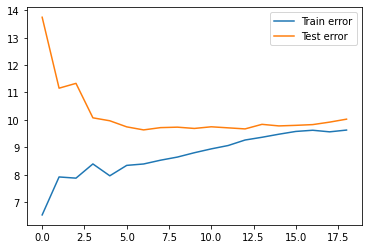

In [96]:
pd.DataFrame({"Train error":train_mses,
              "Test error":test_mses}).plot()

In [97]:
# Gives the best k value
k_best = pd.Series(test_mses, index = ks).idxmin()
k_best

7

In [98]:
# Returns the error associate with the k value
pd.Series(test_mses, index=ks)[k_best]

9.632401386081513

# XGB Regressor

In [104]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from xgboost.sklearn import XGBRegressor

In [108]:
# Other models didn't work as well as KNeighbors. Except XGBRegressor
# Set 1
col_transformer_1 = make_column_transformer(
    (StandardScaler(), ["Chlorine Measured Level"]),
    remainder="drop"
)

# Set 2
col_transformer_2 = make_column_transformer(
    (StandardScaler(), ["Copper Measured Level"]),
    remainder="drop"
)

# Set 3
col_transformer_3 = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

# Set 4
col_transformer_4 = make_column_transformer(
    (StandardScaler(), ["Copper Measured Level", "Uranium Measured Level"]),
    remainder="drop"
)

i = 0
for transformer in [col_transformer_1,
                    col_transformer_2,
                    col_transformer_3,
                    col_transformer_4]:

  pipeline = make_pipeline(
      transformer,
      ## Tried these models but they weren't promising
      #ElasticNet(alpha=0.01)
      #Ridge(alpha=0.5)
      XGBRegressor(n_estimators=20, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
      #linear_model.LinearRegression()
  )

  scores = cross_val_score(
     pipeline,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)

  i += 1
  print("Set " + str(i) + " test error:", (-scores.mean())**0.5)

Set 1 test error: 12.37343348239816
Set 2 test error: 11.39736606163992
Set 3 test error: 9.996722387131227
Set 4 test error: 10.306962604657809


In [119]:
# Using set 3 with only Uranium for XGB
col_transformer_XGB = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

pipeline_best = make_pipeline(
  col_transformer_XGB,
  XGBRegressor(n_estimators=20, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
)

In [120]:
col_transformer_opt2 = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

ns, test_mses, train_mses = range(1, 50), [], []
for n in ns:
  pipeline_opt2 = make_pipeline(
      col_transformer_opt2,
      XGBRegressor(n_estimators=n, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
  )
  pipeline_opt2.fit(x_train, y_train)
  y_train_ = pipeline_opt2.predict(x_train)

  scores = cross_val_score(
     pipeline_opt2,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)
  
  train_mses.append(mean_squared_error(y_train, y_train_)**0.5)
  test_mses.append((-scores.mean())**0.5)

<Axes: >

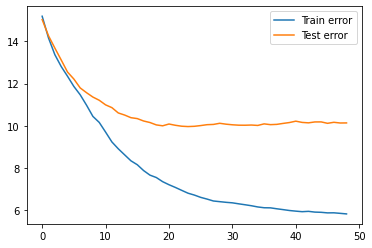

In [121]:
pd.DataFrame({"Train error":train_mses,
              "Test error":test_mses}).plot()

In [122]:
# Gives the best n value
n_best = pd.Series(test_mses, index = ns).idxmin()
n_best

24

# Ensemble :

In [123]:
col_transformer_sub_1 = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

model1 = make_pipeline(
      col_transformer_sub_1,
      KNeighborsRegressor(n_neighbors=7, metric="manhattan")
)

model1.fit(X=x_train, y=y_train)
model1.predict(X=pd.DataFrame(x_test))

scores = cross_val_score(
     model1,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)
(-scores.mean())**0.5

9.632401386081513

In [125]:
col_transformer_sub_2 = make_column_transformer(
    (StandardScaler(), ["Uranium Measured Level"]),
    remainder="drop"
)

model2 = make_pipeline(
      col_transformer_sub_1,
      XGBRegressor(n_estimators=24, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
)

model2.fit(X=x_train, y=y_train)
model2.predict(X=pd.DataFrame(x_test))

scores = cross_val_score(
     model2,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)
(-scores.mean())**0.5

9.961102170306392

In [126]:
from sklearn.linear_model import LinearRegression

Ensembling the models together made it worse. Kneighbors was the best.

In [127]:
from sklearn.ensemble import VotingRegressor
voter = VotingRegressor([("Model 1", model1),
                         ("Model 2", model2)])
(-cross_val_score(voter, x_train, y_train,
                 scoring="neg_mean_squared_error",
                 cv=4).mean())**0.5

10.045323007461242

In [128]:
from sklearn.ensemble import StackingRegressor
stacker = StackingRegressor([("Model 1", model1),
                             ("Model 2", model2)],
                            final_estimator=LinearRegression())
(-cross_val_score(stacker, x_train, y_train,
                 scoring="neg_mean_squared_error",
                 cv=4).mean())**0.5

10.42799904776053

# Using only geographic information

In [132]:
## These sets were the best combinations of geographic data
# Set 1
col_transformer_1 = make_column_transformer(
    (StandardScaler(), ["Latitude"]),
    remainder="drop"
)

# Set 2
col_transformer_2 = make_column_transformer(
    (StandardScaler(), ["Longitude"]),
    remainder="drop"
)

# Set 3
col_transformer_3 = make_column_transformer(
    (StandardScaler(), ["Altitude (Meters)"]),
    remainder="drop"
)

# Set 4
col_transformer_4 = make_column_transformer(
    (StandardScaler(), ["Latitude", "Longitude", "Altitude (Meters)"]),
    remainder="drop"
)

i = 0
for transformer in [col_transformer_1,
                    col_transformer_2,
                    col_transformer_3,
                    col_transformer_4]:

  pipeline = make_pipeline(
      transformer,
      KNeighborsRegressor(n_neighbors=20, metric="euclidean")
  )

  scores = cross_val_score(
     pipeline,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)

  i += 1
  print("Set " + str(i) + " test error:", (-scores.mean())**0.5)

Set 1 test error: 10.306573974087284
Set 2 test error: 10.3191951801808
Set 3 test error: 10.338093473492425
Set 4 test error: 10.144403670661639


In [133]:
# Using set 4 with all geographic data.
col_transformer = make_column_transformer(
    (StandardScaler(), ["Latitude", "Longitude", "Altitude (Meters)"]),
    remainder="drop"
)

pipeline_best = make_pipeline(
  col_transformer,
  KNeighborsRegressor(n_neighbors=20)
)

In [134]:
grid_cv = GridSearchCV(
     pipeline_best,
     param_grid={
         "columntransformer__standardscaler" : [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()],
         "kneighborsregressor__metric": ["manhattan", "euclidean", "cosine"],
     },
     scoring="neg_mean_squared_error", cv=10)
grid_cv.fit(x_train, y_train)
grid_cv.best_params_

{'columntransformer__standardscaler': MinMaxScaler(),
 'kneighborsregressor__metric': 'manhattan'}

In [139]:
col_transformer_opt = make_column_transformer(
    (MinMaxScaler(), ["Latitude", "Longitude", "Altitude (Meters)"]),
    remainder="drop"
)

ks, test_mses, train_mses = range(1, 25), [], []
for k in ks:
  pipeline_opt = make_pipeline(
      col_transformer_opt,
      KNeighborsRegressor(n_neighbors=k, metric="manhattan")
  )
  pipeline_opt.fit(x_train, y_train)
  y_train_ = pipeline_opt.predict(x_train)

  scores = cross_val_score(
     pipeline_opt,
     X=x_train,
     y=y_train,
     scoring="neg_mean_squared_error",
     cv=10)
  
  train_mses.append(mean_squared_error(y_train, y_train_)**0.5)
  test_mses.append((-scores.mean())**0.5)

<Axes: >

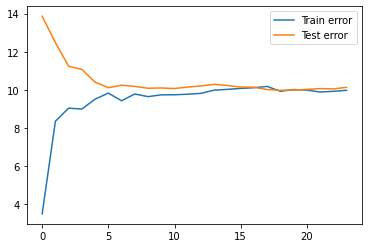

In [140]:
pd.DataFrame({"Train error":train_mses,
              "Test error":test_mses}).plot()

In [141]:
# Gives the best k value
k_best = pd.Series(test_mses, index = ks).idxmin()
k_best

19

In [142]:
# Returns the error associate with the k value
pd.Series(test_mses, index=ks)[k_best]

9.974551297771466

In conclusion, I found out Uranium was the best indicator to predict Arsenic levels. I wonder if the uranium mines nearby led to high levels in both Arsenic and Uranium. Here are the MSES for each:

**Chemicals:**

K-Neighbors - 9.632

XGB - 9.961

**Geographic Data:**

K-Neighbors - 9.974